<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/DecisionTree/32_DecisionTreeRegressorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# bu ödevde decision tree regression la bir regresyon datası bulup çözmeye çalışacağız feature engineering ide yapmamız lazım data üzerinde
# ikinci olarakta decision tree regression la bulduğumuz regresyonu diğer regresyon çözme yöntemleriyle karşılaştıralım linear regression olur svr olur knn regressor olur.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


In [12]:
# label encoder

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()

In [15]:
df['sex'] = label_encoder.fit_transform(df['sex'])

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [18]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [22]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [24]:
# one-hot-encoding

In [25]:
df = pd.get_dummies(df,columns=['region'],drop_first=True)

In [26]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 66.8 KB


In [28]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


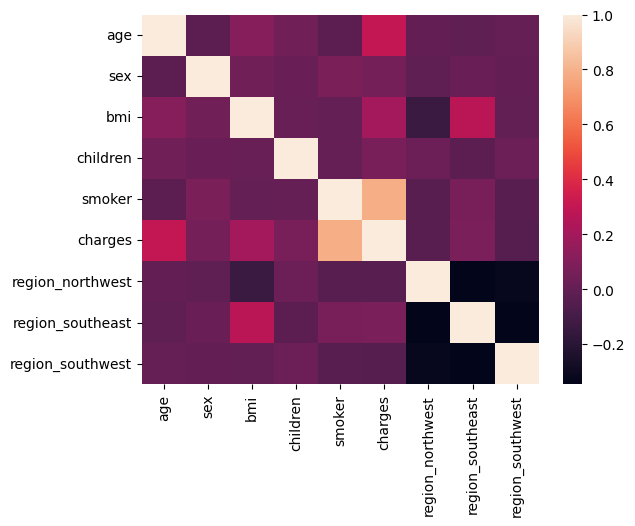

In [29]:
sns.heatmap(df.corr())
plt.show()

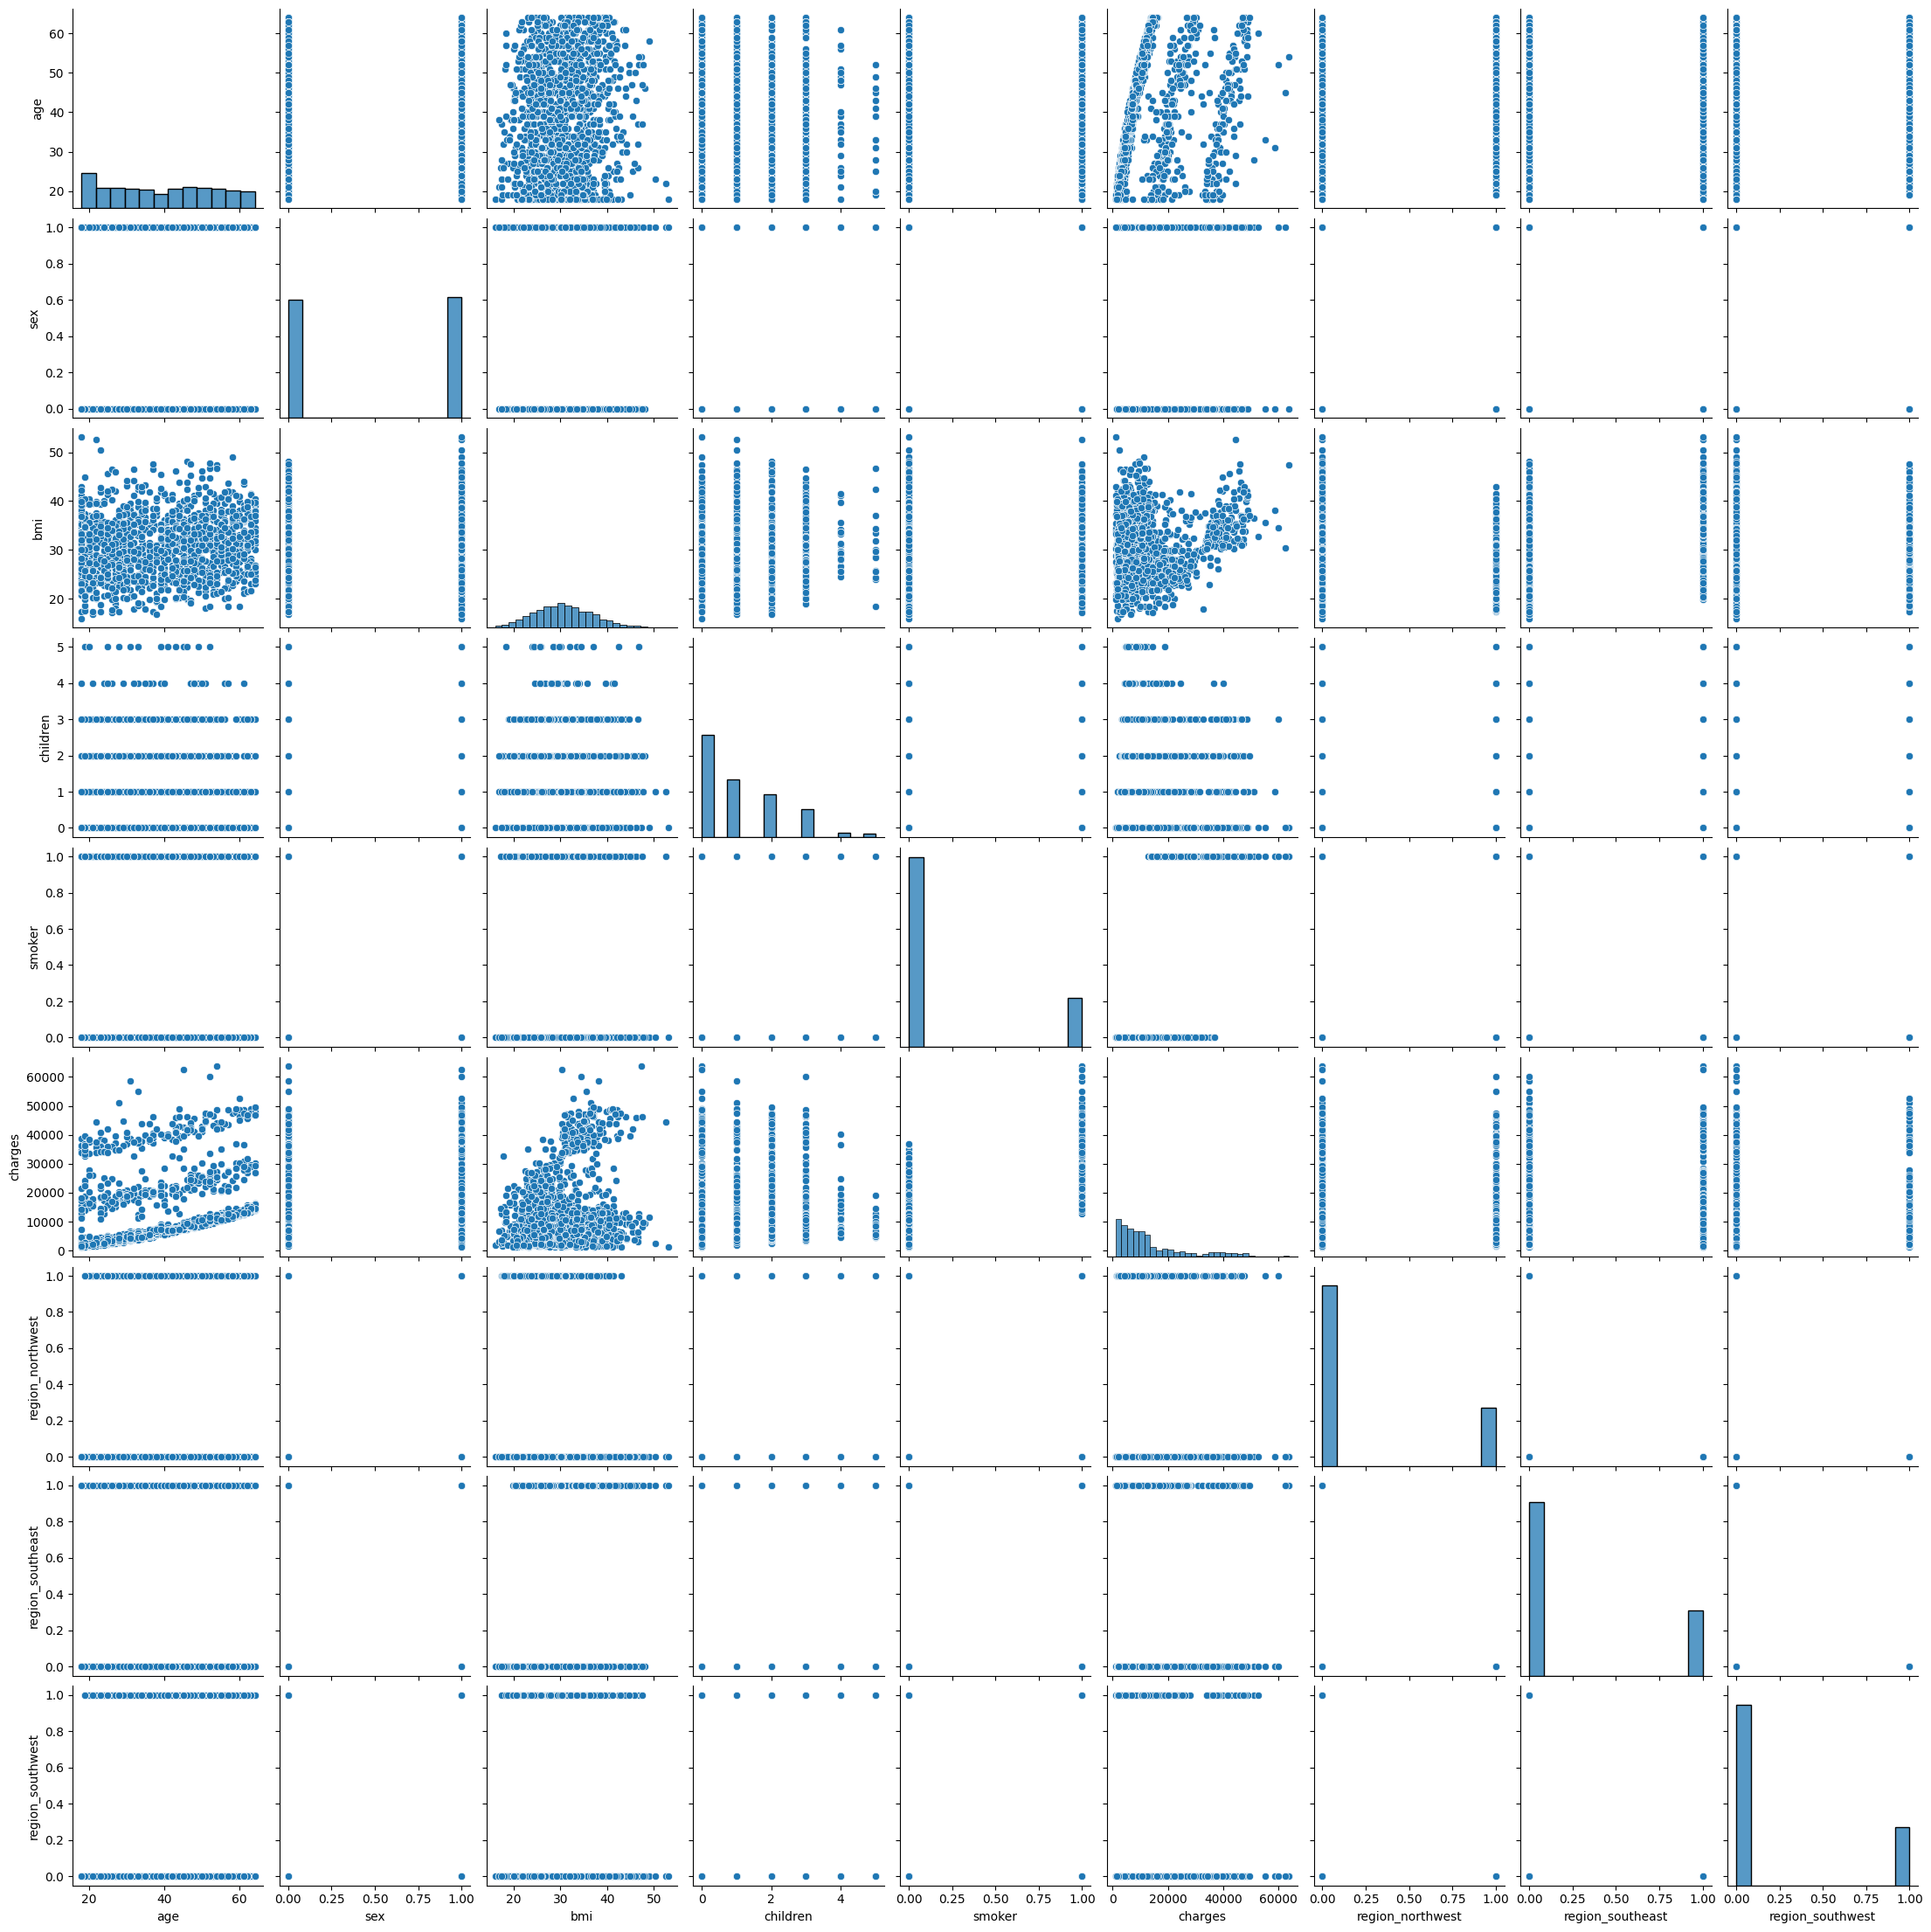

In [30]:
sns.pairplot(df)
plt.show()

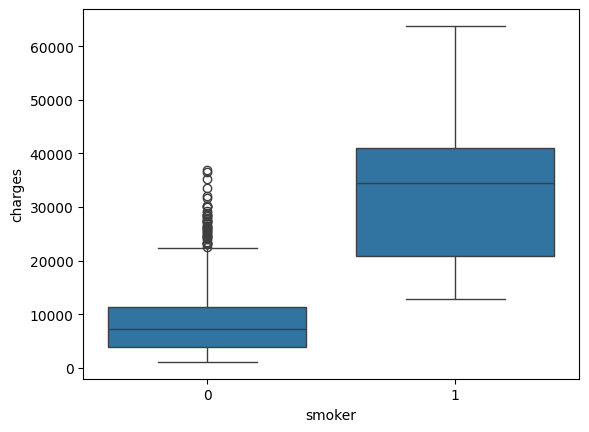

In [31]:
sns.boxplot(x=df['smoker'],y=df['charges'])
plt.show()

In [32]:
X = df.drop('charges',axis=1)
y = df['charges']

In [33]:
# train-test-split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [36]:
X_train.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
525,18,0,33.880,0,0,False,True,False
183,44,0,26.410,0,0,True,False,False
821,26,1,17.670,0,0,True,False,False
1237,58,0,28.215,0,0,True,False,False
1185,45,1,23.560,2,0,False,False,False


In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
tree_model = DecisionTreeRegressor(criterion="squared_error",max_depth=None,random_state=None)

In [39]:
tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
y_pred = tree_model.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)

mae :  2872.8256970000007
mse :  35944311.25765931
r2_score :  0.7647953448105972


[Text(0.678349610785606, 0.9791666666666666, 'smoker <= 0.5\nsquared_error = 141928800.357\nsamples = 936\nvalue = 13275.519'),
 Text(0.45618282694460494, 0.9375, 'age <= 43.5\nsquared_error = 38199665.204\nsamples = 751\nvalue = 8715.843'),
 Text(0.5672662188651054, 0.9583333333333333, 'True  '),
 Text(0.24959707451610574, 0.8958333333333334, 'children <= 0.5\nsquared_error = 22758815.375\nsamples = 405\nvalue = 5442.403'),
 Text(0.13435288169868553, 0.8541666666666666, 'age <= 32.5\nsquared_error = 17397084.953\nsamples = 178\nvalue = 3847.351'),
 Text(0.09099378881987577, 0.8125, 'age <= 22.5\nsquared_error = 15774171.875\nsamples = 144\nvalue = 3221.642'),
 Text(0.049646107178968654, 0.7708333333333334, 'bmi <= 29.957\nsquared_error = 12194055.501\nsamples = 86\nvalue = 2516.563'),
 Text(0.021898021089123212, 0.7291666666666666, 'age <= 19.5\nsquared_error = 134278.771\nsamples = 40\nvalue = 1809.158'),
 Text(0.012364581828686985, 0.6875, 'sex <= 0.5\nsquared_error = 70769.839\nsam

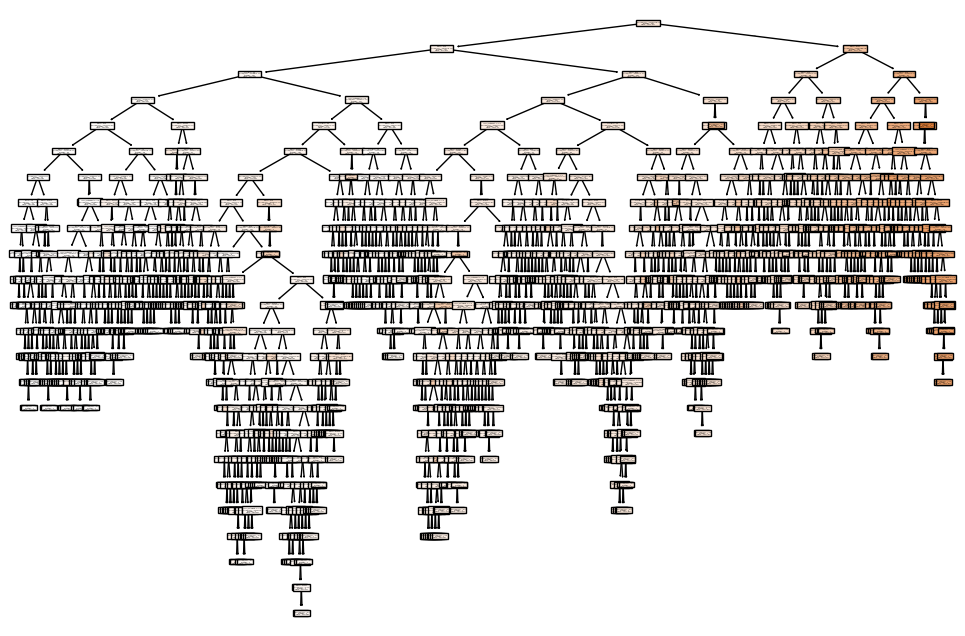

In [43]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(tree_model.fit(X_train,y_train),feature_names=X_train.columns,filled=True)

In [44]:
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)

mae :  2821.7207124386637
mse :  19668580.2794065
r2_score :  0.8582562918099391


[Text(0.5, 0.875, 'smoker <= 0.5\nsquared_error = 141928800.357\nsamples = 936\nvalue = 13275.519'),
 Text(0.25, 0.625, 'age <= 43.5\nsquared_error = 38199665.204\nsamples = 751\nvalue = 8715.843'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'children <= 0.5\nsquared_error = 22758815.375\nsamples = 405\nvalue = 5442.403'),
 Text(0.0625, 0.125, 'squared_error = 17397084.953\nsamples = 178\nvalue = 3847.351'),
 Text(0.1875, 0.125, 'squared_error = 23403797.135\nsamples = 227\nvalue = 6693.149'),
 Text(0.375, 0.375, 'age <= 58.5\nsquared_error = 29049524.312\nsamples = 346\nvalue = 12547.47'),
 Text(0.3125, 0.125, 'squared_error = 23857287.321\nsamples = 262\nvalue = 11516.426'),
 Text(0.4375, 0.125, 'squared_error = 31586783.091\nsamples = 84\nvalue = 15763.347'),
 Text(0.75, 0.625, 'bmi <= 30.01\nsquared_error = 136000888.338\nsamples = 185\nvalue = 31785.337'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'age <= 41.0\nsquared_error = 22501926.404\nsamples = 88\nvalue = 20

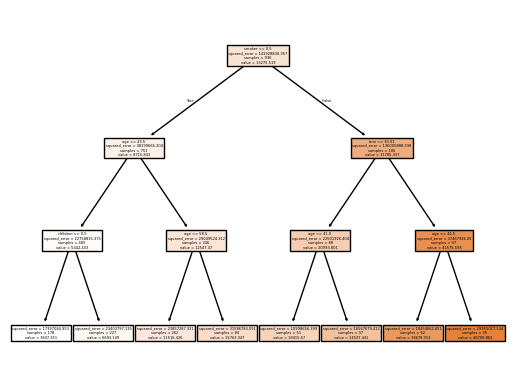

In [45]:
tree.plot_tree(tree_model.fit(X_train,y_train),feature_names=X_train.columns,filled=True)

In [46]:
# hyperparameter-tuning

In [47]:
params = {
    "criterion" : ["squared_error","friedman_mse", "absolute_error", "poisson"],
    "max_depth" : [1,2,3,4,5,16,None],
    "max_features" : ["sqrt","log2","None"],
    "splitter"  : ["best","random"]
}

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params,verbose=3,cv=5,n_jobs=-1,scoring='r2')

In [50]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 16, None],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [51]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [52]:
y_pred = grid.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)

mae :  4242.092996705433
mse :  31811403.590234935
r2_score :  0.7977474256001257


In [53]:
tree_model_new = DecisionTreeRegressor(criterion="friedman_mse",max_depth=5,max_features='log2',splitter='best')

In [54]:
tree_model_new.fit(X_train,y_train)
y_pred = tree_model_new.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)

mae :  3688.501697772767
mse :  34771728.49930566
r2_score :  0.7789260827372971


[Text(0.5, 0.9166666666666666, 'bmi <= 29.62\nfriedman_mse = 141928800.357\nsamples = 936\nvalue = 13275.519'),
 Text(0.25, 0.75, 'smoker <= 0.5\nfriedman_mse = 57823842.602\nsamples = 412\nvalue = 10513.68'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'age <= 44.5\nfriedman_mse = 33424466.64\nsamples = 331\nvalue = 7974.511'),
 Text(0.0625, 0.4166666666666667, 'age <= 31.5\nfriedman_mse = 17729409.995\nsamples = 204\nvalue = 5216.654'),
 Text(0.03125, 0.25, 'children <= 0.5\nfriedman_mse = 18023460.348\nsamples = 122\nvalue = 4007.357'),
 Text(0.015625, 0.08333333333333333, 'friedman_mse = 12555324.377\nsamples = 73\nvalue = 3012.948'),
 Text(0.046875, 0.08333333333333333, 'friedman_mse = 22501941.643\nsamples = 49\nvalue = 5488.823'),
 Text(0.09375, 0.25, 'children <= 1.5\nfriedman_mse = 11879041.336\nsamples = 82\nvalue = 7015.852'),
 Text(0.078125, 0.08333333333333333, 'friedman_mse = 10157866.347\nsamples = 49\nvalue = 6449.468'),
 Text(0.109375, 

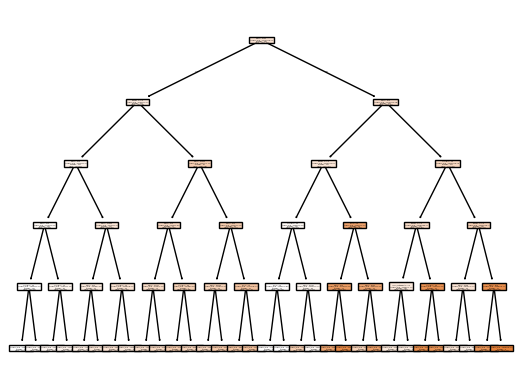

In [55]:
tree.plot_tree(tree_model_new.fit(X_train,y_train),feature_names=X_train.columns,filled=True)

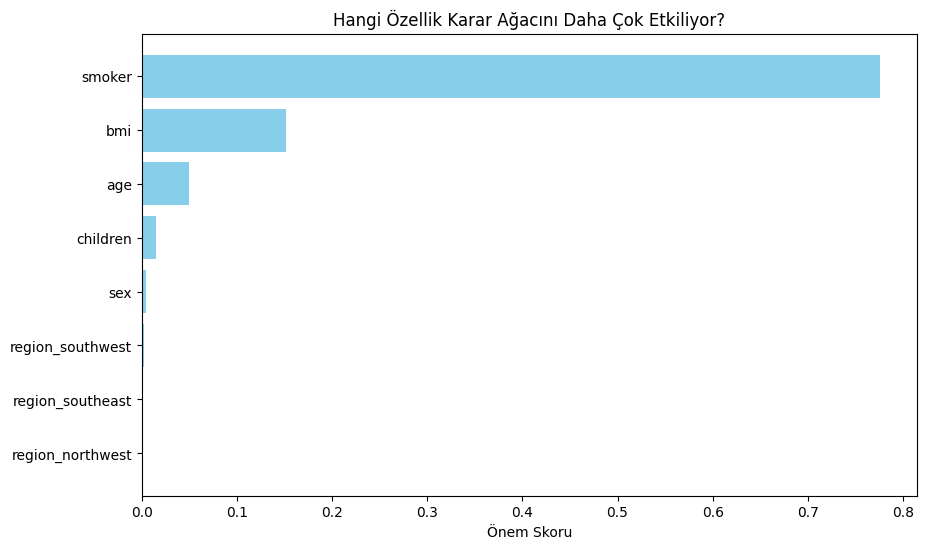

In [56]:
# En iyi modelden önem derecelerini alıyoruz
importances = grid.best_estimator_.feature_importances_
feature_names = X.columns # X, eğitim verilerindeki sütun isimleri

# Görselleştirme aşaması
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Önem Skoru')
plt.title('Hangi Özellik Karar Ağacını Daha Çok Etkiliyor?')
plt.gca().invert_yaxis()
plt.show()

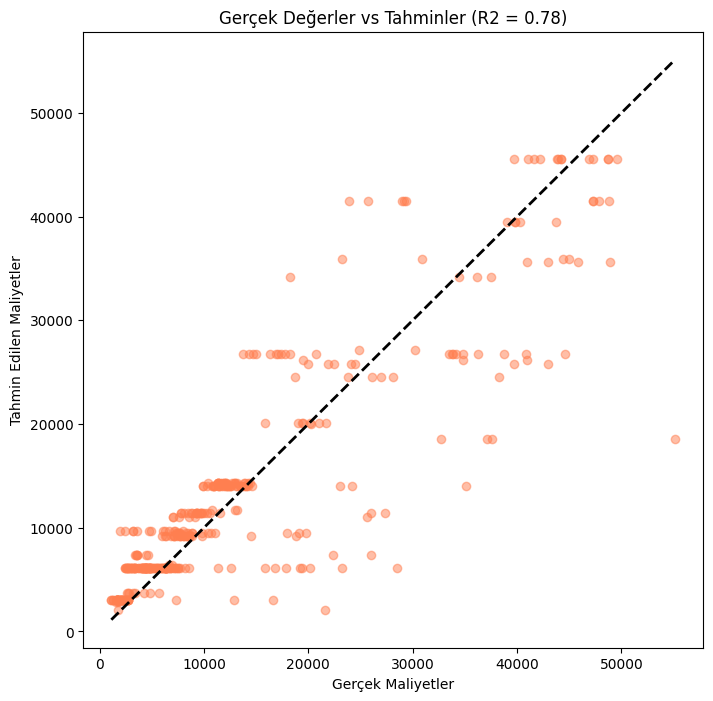

In [57]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='coral')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # İdeal çizgi
plt.xlabel('Gerçek Maliyetler')
plt.ylabel('Tahmin Edilen Maliyetler')
plt.title('Gerçek Değerler vs Tahminler (R2 = 0.78)')
plt.show()

In [58]:
# Linear Regression

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
linear = LinearRegression()

In [64]:
linear.fit(X_train_scaled,y_train)

LinearRegression()

In [65]:
y_pred = linear.predict(X_test_scaled)

In [66]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)

mae :  4148.741444757108
mse :  33557267.846797116
r2_score :  0.786647458274232


In [67]:
# KNN

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [69]:
regressor = KNeighborsRegressor(n_neighbors=5,algorithm="auto")

In [70]:
regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [71]:
y_pred = regressor.predict(X_test_scaled)

In [72]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)

mae :  3286.5477166343285
mse :  26181543.485819764
r2_score :  0.8335413099032579


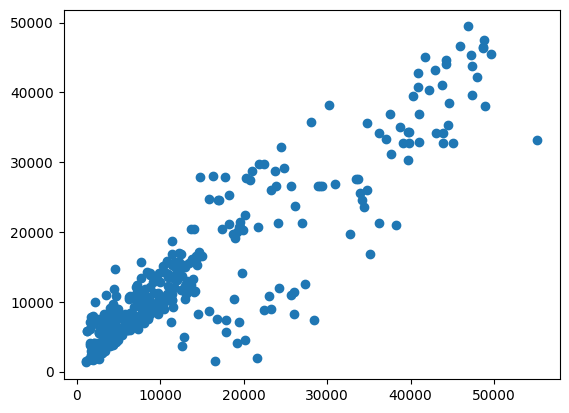

In [73]:
plt.scatter(y_test,y_pred)
plt.show()

mae :  3296.3548150863544
mse :  25676027.175735142
r2_score :  0.8367553138004995


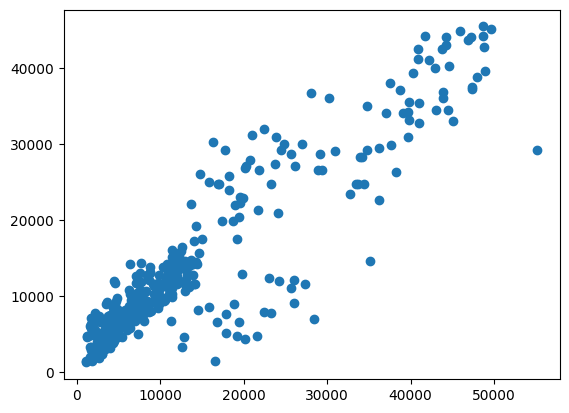

In [74]:
regressor = KNeighborsRegressor(n_neighbors=7,algorithm="auto")
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)
plt.scatter(y_test,y_pred)
plt.show()

In [75]:
# SVM

In [76]:
from sklearn.svm import SVR

In [77]:
svr = SVR()

In [78]:
svr.fit(X_train_scaled,y_train)

SVR()

In [79]:
y_pred = svr.predict(X_test_scaled)

mae :  8712.548282563146
mse :  169947520.18471342
score :  -0.0805032029703987


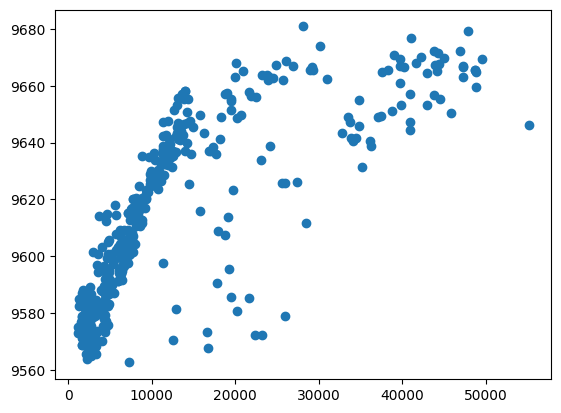

In [80]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("score : ",score)
plt.scatter(y_test,y_pred)
plt.show()

In [81]:
param_grid = {
     "C" : [0.1,1,10,100,1000],
    "gamma" : ["scale","auto"],
    "kernel" : ["rbf","linear"]
}

In [82]:
grid = GridSearchCV(estimator =SVR(),param_grid = param_grid,n_jobs=-1,verbose = 3)

In [83]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [84]:
grid.best_params_

{'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}

mae :  3345.247640617317
mse :  45293330.28337517
r2_score :  0.7120311706155447


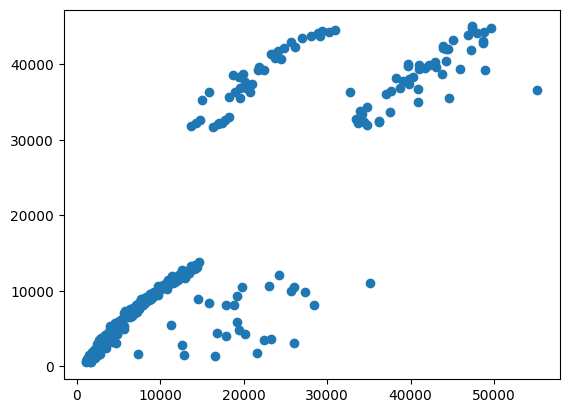

In [88]:
svr = SVR(C=1000, gamma= 'auto', kernel= 'linear')
svr.fit(X_train_scaled,y_train)
y_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)
plt.scatter(y_test,y_pred)
plt.show()

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Her model için ayrı bir pipeline
pipelines = {
    "Linear Regression": Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())]),
    "KNN": Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor())]),
    "SVM": Pipeline([('scaler', StandardScaler()), ('svr', SVR(kernel='linear',gamma= 'auto',C = 1000))])
}

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train) # Ham veriyi verirsin, o içeride ölçeklendirir
    score = pipe.score(X_test, y_test)
    print(f"{name} R2 Score: {score:.4f}")

Linear Regression R2 Score: 0.7866
KNN R2 Score: 0.8335
SVM R2 Score: 0.7120
